- Crie um notebook com os imports necessários e um código para gerar os gráficos referentes à base de dados

- Como deixar mais automatizado?

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys

sns.set()

def plota_pivot_table(df, value, index, func, ylabel, xlabel, opcao='nada'):
    if opcao == 'nada':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).plot(figsize=[15, 5])
    elif opcao == 'sort':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).sort_values(value).plot(figsize=[15, 5])
    elif opcao == 'unstack':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).unstack().plot(figsize=[15, 5])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    return None

mes = sys.argv[1]

# Gerando e salvando os gráficos referentes ao meses pedidos:

meses = ['MAR', 'ABR', 'MAI', 'JUN', 'DEZ']

for mes in meses:
    nome_arquivo = 'SINASC_RO_2019_' + mes + '.csv'

    sinasc = pd.read_csv('./input/'+ nome_arquivo)
    
    plota_pivot_table(sinasc, 'IDADEMAE', ['DTNASC', 'SEXO'], 'mean', 'media idade mae','data de nascimento','unstack')
    plt.savefig('./output/figs/'+max_data+'/media idade mae por sexo.png')

    plota_pivot_table(sinasc, 'PESO', ['DTNASC', 'SEXO'], 'mean', 'media peso bebe','data de nascimento','unstack')
    plt.savefig('./output/figs/'+max_data+'/media peso bebe por sexo.png')

    plota_pivot_table(sinasc, 'PESO', 'ESCMAE', 'median', 'apgar1 medio','gestacao','sort')
    plt.savefig('./output/figs/'+max_data+'/media apgar1 por escolaridade mae.png')

    plota_pivot_table(sinasc, 'APGAR1', 'GESTACAO', 'mean', 'apgar1 medio','gestacao','sort')
    plt.savefig('./output/figs/'+max_data+'/media apgar1 por gestacao.png')

    plota_pivot_table(sinasc, 'APGAR5', 'GESTACAO', 'mean', 'apgar5 medio','gestacao','sort')
    plt.savefig('./output/figs/'+max_data+'/media apgar5 por gestacao.png')
 

In [56]:
# Como deixar mais automatizado?

# Talvez adicionando o mês também como argumento da função?


def plota_pivot_table_mes(mes, value, index, func, ylabel, xlabel, opcao='nada'):
    nome_arquivo = 'SINASC_RO_2019_' + mes + '.csv'
    sinasc = pd.read_csv('./input/'+ nome_arquivo)
    print(nome_arquivo)
    sinasc.head(2)
    
    if opcao == 'nada':
        pd.pivot_table(sinasc, values=value, index=index,
                       aggfunc=func).plot(figsize=[15, 5])
    elif opcao == 'sort':
        pd.pivot_table(sinasc, values=value, index=index,
                       aggfunc=func).sort_values(value).plot(figsize=[15, 5])
    elif opcao == 'unstack':
        pd.pivot_table(sinasc, values=value, index=index,
                       aggfunc=func).unstack().plot(figsize=[15, 5])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    return None

SINASC_RO_2019_ABR.csv


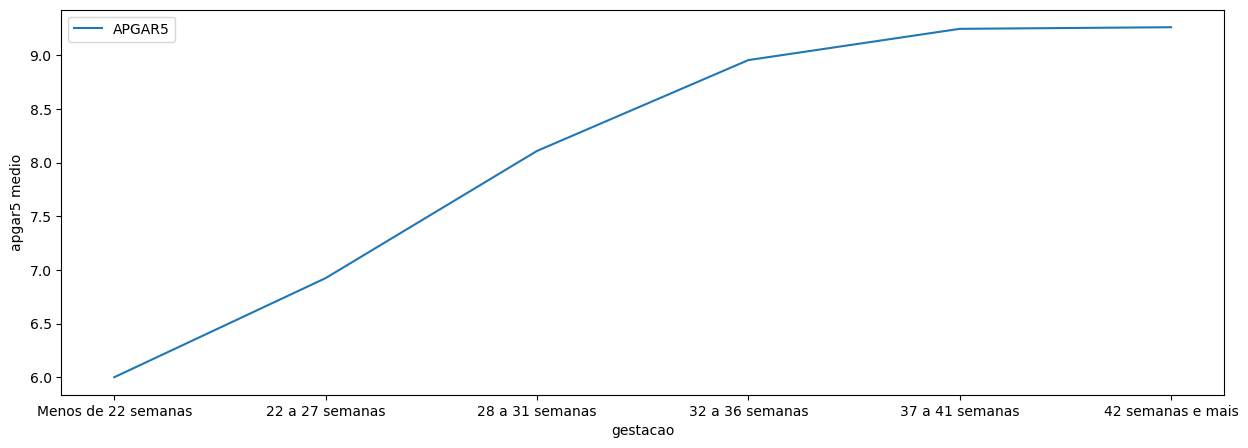

In [57]:
plota_pivot_table_mes('ABR', 'APGAR5', 'GESTACAO', 'mean', 'apgar5 medio','gestacao','sort')

SINASC_RO_2019_DEZ.csv


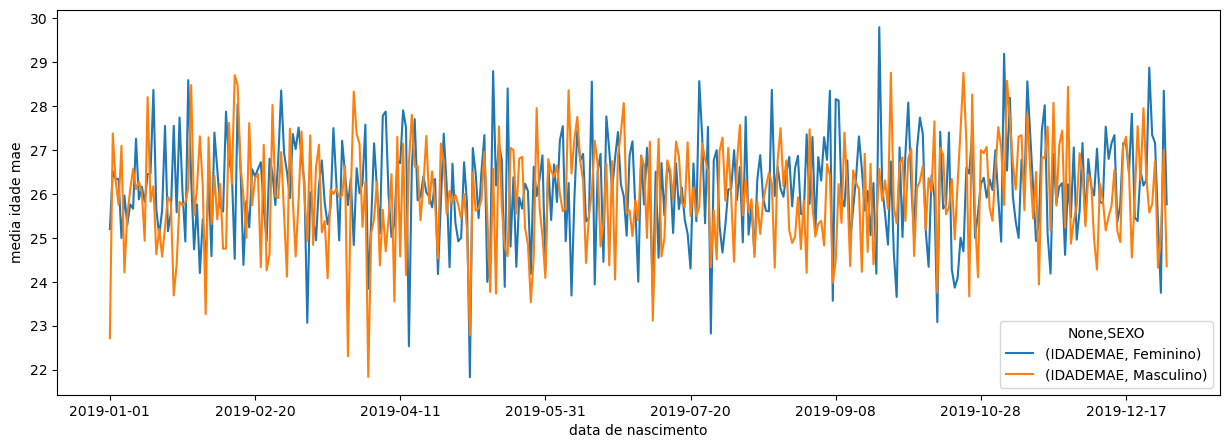

In [58]:
plota_pivot_table_mes('DEZ', 'IDADEMAE', ['DTNASC', 'SEXO'], 'mean', 'media idade mae','data de nascimento','unstack')
